In [1]:
import random

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense, Embedding, Bidirectional, LSTM , TextVectorization
from keras.datasets import imdb
from sklearn.metrics import confusion_matrix
import random
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
import spacy
import string
np.random.seed(0)

In [2]:
max_features = 20000
maxlen = 150  # cut texts after this number of words (among top max_features most common words)
batch_size = 64
datasets = {"train":{},"test":{}}
start_char = 1
oov_char = 2
index_from = 3

Загрузка датасета.

In [3]:
(datasets["train"]["data"], datasets["train"]["target"]), (datasets["test"]["data"], datasets["test"]["target"]) = \
    imdb.load_data(num_words=max_features)

In [4]:
print(len(datasets["train"]["data"]), 'train sequences')
print(len(datasets["test"]["data"]), 'test sequences')

25000 train sequences
25000 test sequences


In [5]:
datasets["train"]["data"]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [6]:
datasets["train"]["data"] = pad_sequences(datasets["train"]["data"], maxlen=maxlen)
datasets["test"]["data"] = pad_sequences(datasets["test"]["data"], maxlen=maxlen)

Просмотр случайных элементов датасета.

In [14]:
print("Train shape: ",datasets["train"]["data"].shape)
print("Test shape: ",datasets["test"]["data"].shape)

Train shape:  (25000, 150)
Test shape:  (25000, 150)


In [15]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
history = model.fit(datasets["train"]["data"], datasets["train"]["target"],
          batch_size=batch_size,

          epochs=6,
          validation_data=(datasets["test"]["data"],datasets["test"]["target"]))

Epoch 1/6
391/391 [==============================] - 167s 414ms/step - loss: 0.4154 - accuracy: 0.7966 - val_loss: 0.3186 - val_accuracy: 0.8646
Epoch 2/6
391/391 [==============================] - 160s 409ms/step - loss: 0.2215 - accuracy: 0.9154 - val_loss: 0.3222 - val_accuracy: 0.8610
Epoch 3/6
391/391 [==============================] - 161s 412ms/step - loss: 0.1555 - accuracy: 0.9438 - val_loss: 0.3543 - val_accuracy: 0.8549
Epoch 4/6
391/391 [==============================] - 158s 404ms/step - loss: 0.1086 - accuracy: 0.9621 - val_loss: 0.5097 - val_accuracy: 0.8443
Epoch 5/6
391/391 [==============================] - 159s 408ms/step - loss: 0.0828 - accuracy: 0.9716 - val_loss: 0.6532 - val_accuracy: 0.8392
Epoch 6/6
391/391 [==============================] - 161s 412ms/step - loss: 0.0668 - accuracy: 0.9772 - val_loss: 0.7035 - val_accuracy: 0.8347


In [18]:
score, acc = model.evaluate(datasets["test"]["data"],datasets["test"]["target"],
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

391/391 [==============================] - 8s 21ms/step - loss: 0.7035 - accuracy: 0.8347
Test score: 0.7035434246063232
Test accuracy: 0.8347200155258179


In [19]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.7353824712336063)

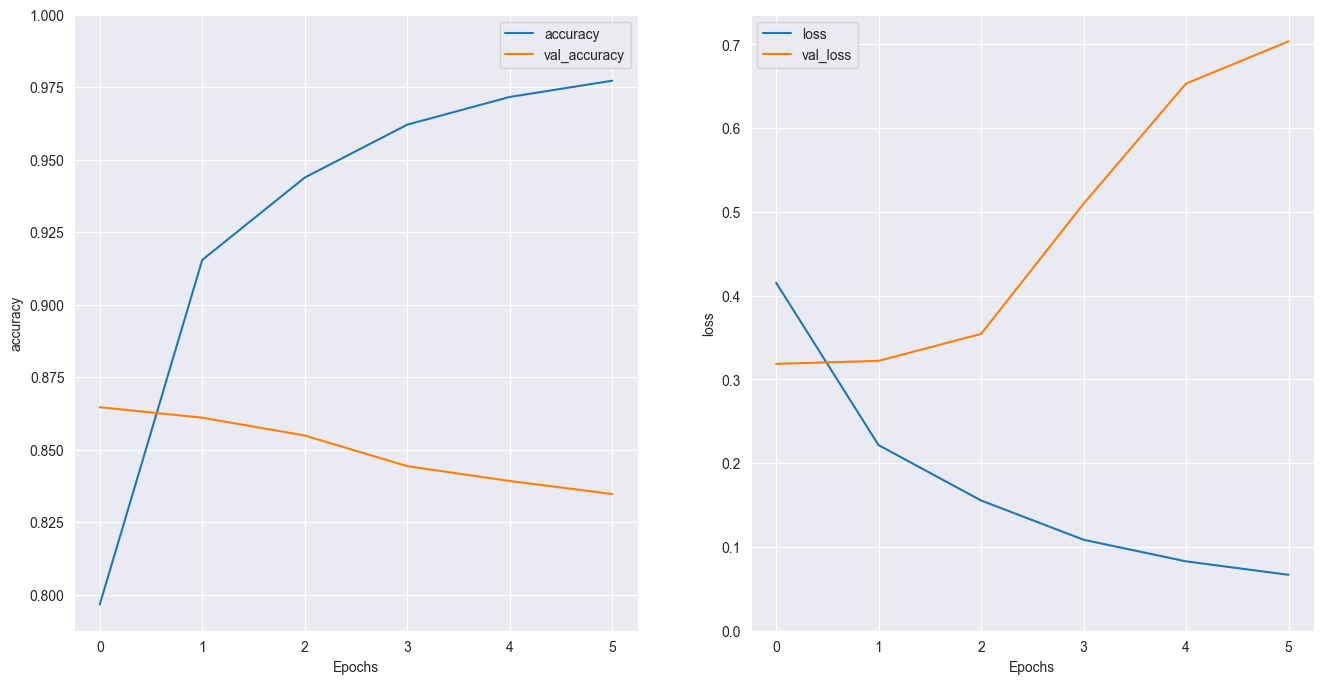

In [20]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

По графикам видно что после 2 эпохи видно резкий скачек потерь на валидационых данных, хотя на тренировочных метрики продолжают расти, что свидетельствует о том что после 2 эпохи начинается процесс переобучения.